In [1]:
%matplotlib inline

In [5]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

ds    y  deaths
0 2020-01-26  0.0       0
1 2020-01-27  0.0       0
2 2020-01-28  0.0       0
3 2020-01-29  0.0       0
4 2020-01-30  0.0       0

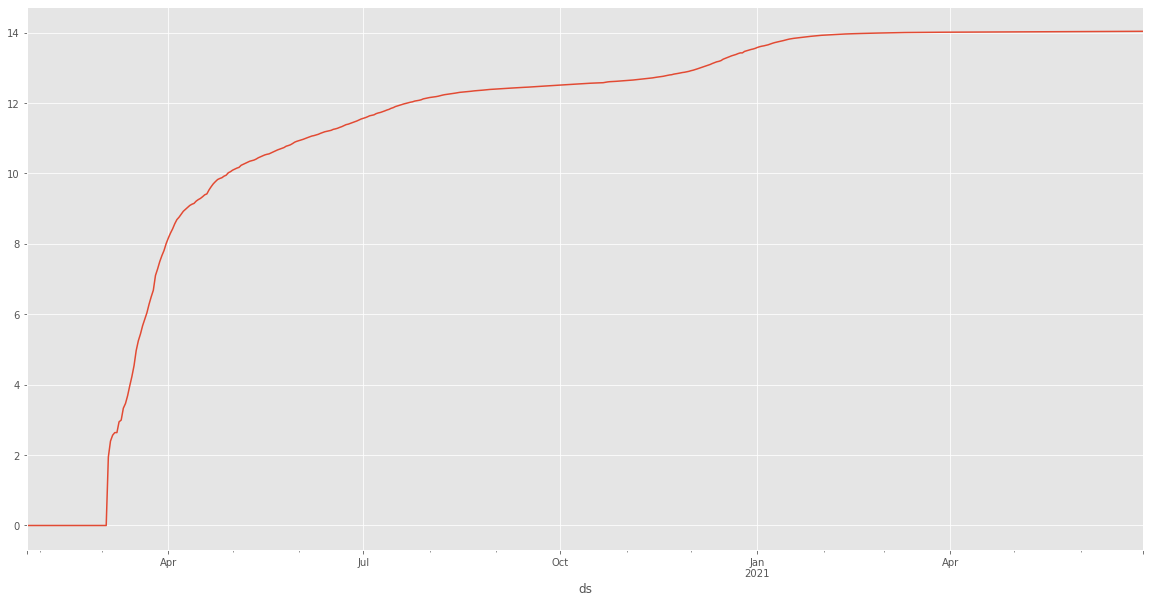

In [6]:
df1 = pd.read_csv('LAcases.csv', index_col='date', parse_dates=True)
df1 = df1.drop(['county','state','fips','cured'], axis =1)
df1 = df1.reset_index().rename(columns={'date':'ds', 'cases':'y'})
df1['y'] = np.log(df1['y'])
df1.set_index('ds').y.plot()
df1.head()

In [7]:
model = Prophet(yearly_seasonality = False, weekly_seasonality = False, daily_seasonality = True, changepoint_range = .9)
model.fit(df1);
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [8]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
547 2021-07-26  14.057183   13.463306   14.607230
548 2021-07-27  14.057571   13.448902   14.671198
549 2021-07-28  14.057959   13.390007   14.673267
550 2021-07-29  14.058347   13.344621   14.715705
551 2021-07-30  14.058735   13.342887   14.773501

In [9]:
forecast.sort_values('trend', ascending=False)[:10]
print(forecast[['ds', 'trend']].sort_values('trend', ascending=False)[:30])

            ds      trend
551 2021-07-30  14.051780
550 2021-07-29  14.051392
549 2021-07-28  14.051004
548 2021-07-27  14.050616
547 2021-07-26  14.050228
546 2021-07-25  14.049840
545 2021-07-24  14.049451
544 2021-07-23  14.049063
543 2021-07-22  14.048675
542 2021-07-21  14.048287
541 2021-07-20  14.047899
540 2021-07-19  14.047511
539 2021-07-18  14.047122
538 2021-07-17  14.046734
537 2021-07-16  14.046346
536 2021-07-15  14.045958
535 2021-07-14  14.045570
534 2021-07-13  14.045182
533 2021-07-12  14.044793
532 2021-07-11  14.044405
531 2021-07-10  14.044017
530 2021-07-09  14.043629
529 2021-07-08  14.043241
528 2021-07-07  14.042853
527 2021-07-06  14.042464
526 2021-07-05  14.042076
525 2021-07-04  14.041688
524 2021-07-03  14.041300
523 2021-07-02  14.040912
522 2021-07-01  14.040524


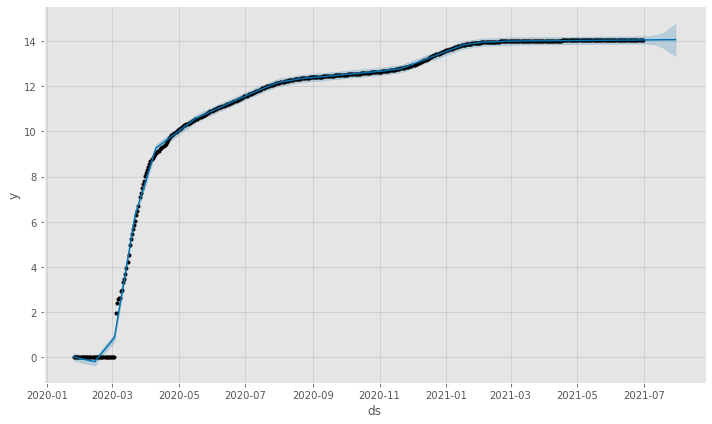

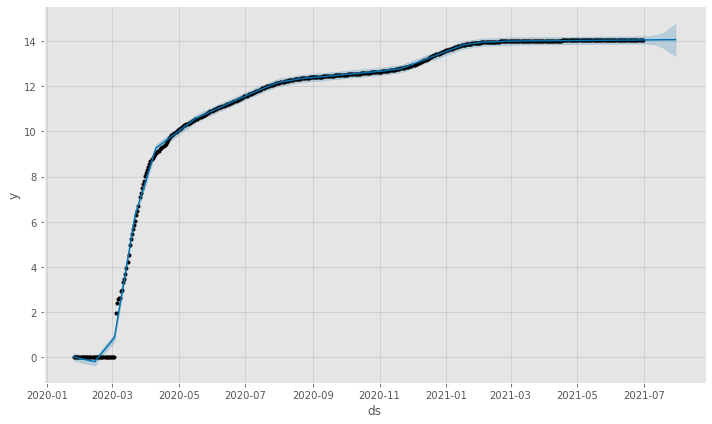

In [10]:
model.plot(forecast)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [13]:
metric_df = forecast.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()

In [14]:
metric_df.dropna(inplace=True)

In [15]:
r2_score(metric_df.y, metric_df.yhat)

0.9988763296664094

In [16]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.016861864566545495

In [17]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.04787275755118447

In [18]:
np.sqrt(np.mean((metric_df.y - metric_df.yhat)**2))

0.12985324241829882